<a href="https://colab.research.google.com/github/pranathi000/ML_libraries/blob/main/Linear_regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### A simple Linear Regression model



We imported the dataset from [here](https://www.kaggle.com/datasets/shubham47/salary-data-dataset-for-linear-regression?select=Salary_Data.csv).

Click on the download tab to access the below code.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubham47/salary-data-dataset-for-linear-regression")

print("Path to dataset files:", path)

100%|██████████| 373/373 [00:00<00:00, 210kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shubham47/salary-data-dataset-for-linear-regression/versions/1


Import necessary Libearies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Relocate to Salary_Data.csv

Remember that you should enter the csv file name as it is.

Print first five rows and observe that there are ( YearsExperience and Salary )where we have to determine the salary based on years of experience.


In [4]:
# Read the CSV file from the downloaded path
df = pd.read_csv(path + "/Salary_Data.csv")  # Assuming the file is named Housing.csv

# Display first 5 rows
print(df.head())


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Plot the histogram

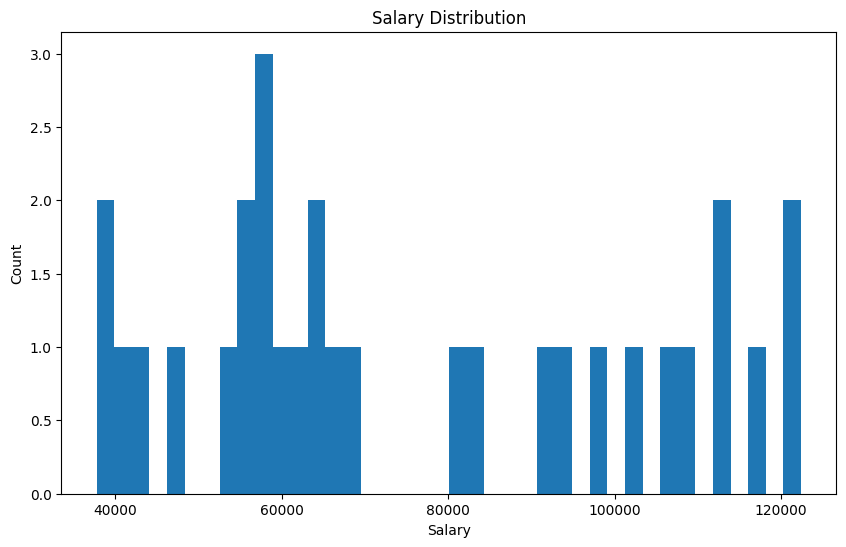

In [15]:

plt.figure(figsize=(10,6))
plt.hist(df['Salary'], bins=40)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

Drop if there are any duplicates

In [16]:
df.drop_duplicates(keep='first', inplace=True)


Build a correlation matrix

In [17]:

correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)

                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


The `np.log()` function is used to apply a logarithmic transformation to the `YearsExperience` and `Salary` columns in the DataFrame.

Logarithmic transformation is often applied to skewed data, like income or experience data, to make the distribution more normal and the relationship between variables more linear.

This can help improve the model's ability to capture the underlying relationships in the data during training.

In [18]:
df['YearsExperience'] = np.log(df['YearsExperience'])
df['Salary'] = np.log(df['Salary'])

I took the bins as 10 as I want the bar graphs of broader size.

The number of bins determines how the data is split up and displayed in the histogram. More bins result in a more detailed histogram, while fewer bins provide a more coarse representation.

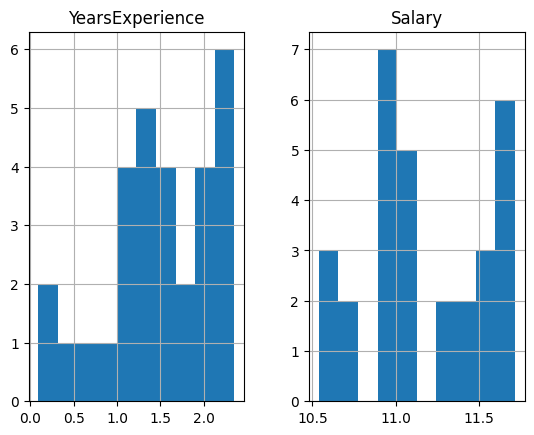

In [20]:
# Check transformed distributions
df[['YearsExperience', 'Salary']].hist(bins=10)
plt.show()


Check if there are any missing values.
It shows 0 indication that there are no missing values.

In [21]:
# Check missing values
print(df.isnull().sum())


YearsExperience    0
Salary             0
dtype: int64


In [22]:

# Split data
from sklearn.model_selection import train_test_split # Importing the train_test_split function from the sklearn.model_selection module
X = df.drop('Salary', axis=1)
y = df['Salary']
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MSE: 0.009181247536977886
R2 Score: 0.871541809683478


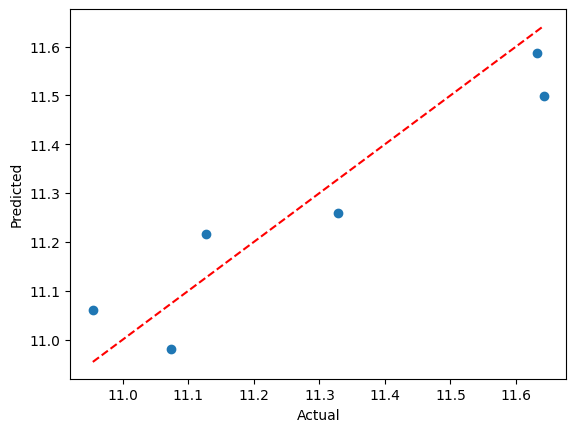

In [26]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()